# ООП

Структура занятия:

1) основы ООП

2) классы

3) экземпляры классов

4) атрибуты

5) свойства

6) статические методы и методы классов

7) магические методы

8) наследование и MRO

## Основы ООП

Объе́ктно-ориенти́рованное программи́рование — методология программирования, основанная на представлении программы в виде совокупности взаимодействующих объектов, каждый из которых является экземпляром определённого класса, а классы образуют иерархию наследования

ООП тесно связанно с понятием моделирования

Основные принципы ООП:

    - Абстракция. Выделяем в моделируемом предмете самое важное для решения конкретной задачи. В конечном счёте получаем контекстное понимание предмета, формализуемое в виде класса;
    - Инкапсуляция. Свойство системы, позволяющее объединить данные и методы, работающие с ними, в классе;
    - Наследование. Свойство системы, позволяющее описать новый класс на основе уже существующего с частично или полностью заимствованной функциональностью;
    - Полиморфизм. Свойство системы, позволяющее использовать объекты с одинаковым интерфейсом без информации о типе и внутренней структуре объекта.
    
Вы можете освоить ООП только если чётко уяснили [SOLID](https://ru.wikipedia.org/wiki/SOLID_(%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BD%D0%BE-%D0%BE%D1%80%D0%B8%D0%B5%D0%BD%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5))

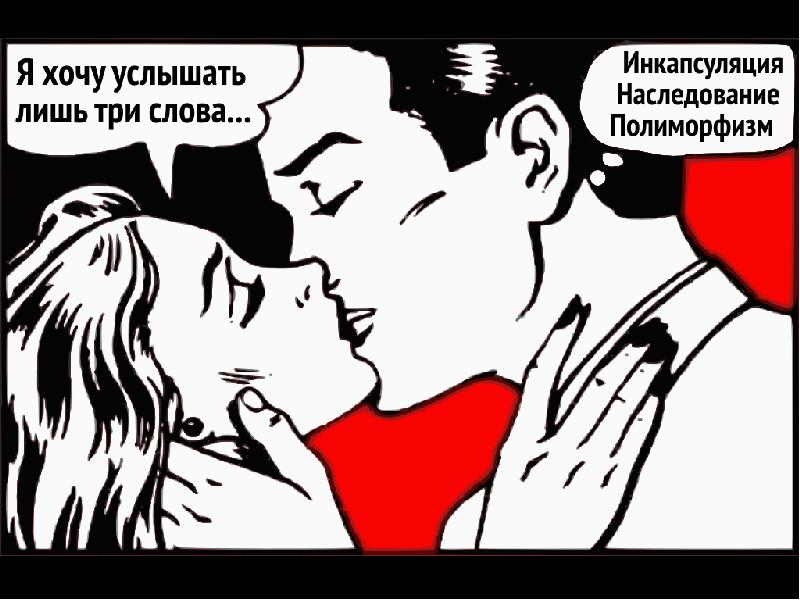

## Классы

Классы = данные + функции. 

Создание класса создает объект нового типа, позволяя создавать новые экземпляры этого типа. К каждому экземпляру класса могут быть прикреплены атрибуты для поддержания его состояния. Экземпляры класса также могут иметь методы (определенные классом) для изменения его состояния.

Объект класса поддерживает 2 вида операций:
- создание экземпляра класса
- доступ к атрибутам класса 

In [21]:
class GeoPoint:  # создали объект типа MyClass
    z = 0  # атрибут класса 
    # self указывает на то что метод принадледит экземпляру класса
    def __init__(self, lat, lon):  # __init__ - конструктор - магический метод, настраивающий экземпляр на определенное начальное состояние
        self.lat = lat  # атрибут экземпляра класса
        self.lon = lon
    def print(self):  # метод экземпляра
        print(f'lat={self.lat},lon={self.lon}')
        
GeoPointAlias = GeoPoint

In [22]:
GeoPoint.print()

TypeError: GeoPoint.print() missing 1 required positional argument: 'self'

In [23]:
GeoPoint.lat

AttributeError: type object 'GeoPoint' has no attribute 'lat'

In [24]:
GeoPoint.z

0

In [25]:
gp = GeoPointAlias(55.751244, 37.618423)  # создали экземпляр класса (типа) MyClass
gp.lat

55.751244

In [129]:
gp.print()

lat=55.751244,lon=37.618423


In [130]:
gp.z

0

In [26]:
type(gp), type(GeoPointAlias)

(__main__.GeoPoint, type)

## Экземпляр класса

Объект экземпляра поддерживает 1 вид операций:
- доступ к атрибутам:
    - полям или атрибутам данных
    - методам
    
Атрибуты данных являются "переменными экземпляра".
Методы - это функции, принадлежащие экземплярам

## Атрибуты

Python не поддерживает явного сокрытия атрибутов, то есть мы не можем объявить переменную или метод приватнымы. Однако, по соглашению, атрибуты, имя которых начинается с `_` считаются приватными, такие методы / переменные лучше не вызывать извне самого класса. 

In [132]:
class Rectangle:
    _precission = 2  # этот атрибут считается приватным, мы не должны осуществлять к нему доступ напрямую
    
    def __init__(self, p1: GeoPoint, p2: GeoPoint):
        self.p1 = p1
        self.p2 = p2
    
    def square(self):
        p1_lat, p1_lon = self._round_point(self.p1)
        p2_lat, p2_lon = self._round_point(self.p2)
        return (p1_lat - p2_lat)*(p1_lon - p2_lon)
        
    def _round_point(self, p):  # этот метод считается приватным, то есть он не будет фигурировать в интерфейсе 
        return round(p.lat, self._precission), round(p.lon, self._precission)
    
    
rc = Rectangle(GeoPoint(55.751244, 37.618423), GeoPoint(52.78872, 34.89872))
rc.square()

8.0512

In [133]:
rc._precission  # это возможно, но не рекомендуется 

2

In [134]:
rc._precission = 5  # и это возможно, но не рекомендуется 
rc._precission

5

In [135]:
Rectangle._precission  # обратите внимание! Атрибут класса не поменялся

2

Также есть механизм искажения имён, который служит целям переопределения сигнатуры метода в потомках (используется при наследовании). Чтобы он заработал, необходимо дать атрибуту имя, которое начинается с `__` и заканчивается словом либо `_`. Такие атрибуты вообще не могут быть вызваны извне класса напрямую

In [196]:
class Mapping:
    def __init__(self, iterable):
        self.items_list = []
        self.__update(iterable)

    def update(self, iterable):
        for item in iterable:
            self.items_list.append(item)

    __update = update   # копируем update()

class MappingSubclass(Mapping):  # MappingSubclass наследник класса Mapping

    def update(self, keys, values):
        # определяем новую сигнатуру для update()
        # но оставляем __init__()
        for item in zip(keys, values):
            self.items_list.append(item)

In [137]:
m = MappingSubclass({1: 2, 3: 4})
m.update((5, 6), (7, 8))
m.items_list

[1, 3, (5, 7), (6, 8)]

In [138]:
m.__update  # не можем обратиться! но не потому что он приватный, а потому как он сокрыт в целях наследования

AttributeError: 'MappingSubclass' object has no attribute '__update'

In [139]:
m._Mapping__update  #  так Питон исказил имя __update

<bound method Mapping.update of <__main__.MappingSubclass object at 0x10e558520>>

In [140]:
m._Mapping__update({2: 3})
m.items_list

[1, 3, (5, 7), (6, 8), 2]

### атрибуты данных

Изменяемые или неизменяемые поля, которые описывают основные параметры модели (класса в целом и каждого экземпляра в частности) 

Примечание: весь блок ниже, до "методов" нужно запускать/перезапускать целиком

In [27]:
GeoPoint.z = 4  # заданное в момент определения класса значение = 0, смотри выше

gp = GeoPoint(55.751244, 37.618423)
gp.z, GeoPoint.z  # новый экземпляр gp инициализироовался с актуальным значением GeoPoint.z

(4, 4)

In [28]:
GeoPoint.z = 5
gp.z, GeoPoint.z  # в этот момент класс и его экземпляр ссылаются ещё на один объект

(5, 5)

In [29]:
GeoPoint.z = 4
gp.z, GeoPoint.z  # и тут

(4, 4)

In [185]:
gp.z = 6  
gp.z, GeoPoint.z  # а тут экземпляр отвязался от класса, получил своё собственное значение z

(6, 4)

In [186]:
GeoPoint.z = 7
gp.z, GeoPoint.z

(6, 7)

In [187]:
GeoPoint.lat = 1  # экземпляр получил атрибут в момент инициализации, мы не можем на него повлиять через класс
gp.lat

55.751244

In [188]:
gp.lat = 55.8  # а напрямую можем
gp.lat

55.8

### методы

Функции, которые связанны с экземплярами классов или с самими классами

In [30]:
gp_print = gp.print
gp_print()

lat=55.751244,lon=37.618423


In [31]:
gp_print = lambda : print('Oh!')
gp_print()

Oh!


In [32]:
gp.print()

lat=55.751244,lon=37.618423


### переменные класса и переменные экземпляра

Вообще говоря, переменные экземпляра предназначены для данных, уникальных для каждого экземпляра, а переменные класса - для атрибутов и методов, общих для всех экземпляров класса.

Если в качестве общих данных использовать изменяемые объекты, такие как списки или словари, могут возникать неожиданные эффекты.

In [37]:
class Student:
    grades = []

    def __init__(self, name):
        self.name = name
        
    def add_grade(self, grade):
        self.grades.append(grade)
        
    def get_year_grade(self):
        return sum(self.grades)/len(self.grades)
        
masha = Student('Masha')
lesha = Student('Lesha')
masha.add_grade(5)
masha.add_grade(5)
lesha.add_grade(2)
lesha.add_grade(2)
masha.get_year_grade(), lesha.get_year_grade()

(3.5, 3.5)

![image](ntan.png)


## Свойства

или вычисляемые/управлемые атрибуты

Задаются, как методы при помощи декоратора `@property`

Доступ к ним осуществляется как к обычным атрибутам данных

In [39]:
import math


class Circle:
    def __init__(self, radius):
        self._radius = radius
        
    @property
    def area(self):  # это совйство вычисляется только в момент обращения к нему
        return 2 * self.radius * math.pi
        
    @property
    def radius(self):  # это свойство связываетс с "условно приватным" атрибутом
        return self._radius

In [40]:
c = Circle(5)
c.radius, c.area  # доступ

(5, 31.41592653589793)

In [62]:
c.radius = 2  # в данном случае мы задали неизменяемое свойство

AttributeError: can't set attribute

Чтобы задать изменяемое свойство, необходимо определить для него `.setter` и/или `.deleter`

In [41]:
import math


class Circle:
    def __init__(self, radius):
        self._radius = radius
        
    @property
    def area(self):
        return 2 * self.radius * math.pi
        
    @property
    def radius(self):
        return self._radius
    
    @radius.setter
    def radius(self, radius):
        self._radius = radius

    @radius.deleter
    def radius(self):
        del self._radius
        
    @property
    def diameter(self):
        return self.radius * 2
    
    @diameter.setter
    def diameter(self, diameter):
        self._radius = diameter / 2

In [46]:
c = Circle(5)
c.radius, c.area

(5, 31.41592653589793)

In [47]:
c.radius = 2
c.radius, c.area, c.diameter

(2, 12.566370614359172, 4)

In [48]:
c.diameter = 2
c.radius, c.area, c.diameter

(1.0, 6.283185307179586, 2.0)

In [49]:
del c.radius

In [50]:
c.radius

AttributeError: 'Circle' object has no attribute '_radius'

Также возможно задать свойство только на запись

In [55]:
import hashlib

class User:
    def __init__(self, name, password):
        self.name = name
        self.password = password
        
    @property
    def password(self):
        raise AttributeError('Password is write only')
        
    @password.setter
    def password(self, plaintext):
        self._hashed_password = hashlib.md5(plaintext.encode())
        
u = User('User Name', 'PaSsWoRd')
u.name

'User Name'

In [56]:
u._hashed_password.hexdigest()

'e2797f6581dacf849a76bb9dd0faf631'

In [57]:
u.password

AttributeError: Password is write only

In [93]:
# help(property)

## Статические методы и методы классов

Статический метод - метод, который ничего не знает об экземпляре класса. Задаётся, как метод при помощи декоратора `@staticmethod`, но без указания `self` 1-м параметром. Нужен для того чтобы связать с классом обычную функцию (не указывающую на атрибуты экземпляра или класса), которая логически относятся к классу

Метод класса - метод, связан не с экхземпляром класса, а с самим классом. Задаётся, как метод при помощи декоратора `@classmethod`, с передачей `cls` 1-м параметром.

Внимание: `cls`, как и `self` являются соглашениями

In [60]:
class Building:
    
    _total_buildings = 0
    
    def __init__(self, name):
        self.name = self.beautify_name(name)
        Building._total_buildings += 1  # а если использовать self._total_buildings ...
        
    @staticmethod
    def beautify_name(name):  # нет self
        return f'*{name.title()}*'
       
    @classmethod
    def total_buildings(cls):  # self заменёна на cls
        print('Всего зданий: ', cls._total_buildings)
        
        
# Создаем объекты        
my_obj1 = Building('horse street, 21')
my_obj2 = Building('dog street, 17')
my_obj3 = Building('cat street, 2')

# Вызываем classmethod 
Building.total_buildings()

Всего зданий:  3


In [9]:
my_obj3.name

'*Cat Street, 2*'

## Магические методы и свойства

Класс может реализовывать операции, которые вызываются с помощью специального синтаксиса (например, с помощью арифметических операций или операции взятия среза), для этого необходимо определить [методы со специальными именами](https://docs.python.org/3/reference/datamodel.html#special-method-names).
Это подход Python к перегрузке операторов.

Имя магического метода всегда начинается и заканчивается `__`

Установка для специального метода значения `None` указывает на то, что соответствующая операция недоступна. Например, если класс присваивает `__iter__()` значение `None`, класс не является итерируемым, поэтому вызов `iter()` в его экземплярах вызовет `TypeError`

Некоторые из специальных методов...

### 1. Управление жизненным циклом объектов

`object.__new__(cls[, ...])` - метод создания класса. Описывает что необходимо сделать классу до инициализации его экземпляров.

`object.__init__(self[, ...])` - конструктор класса. Инициализирует экземпляр класса некоторым изначальным состоянием.

`object.__del__(self)` - деструктор класса. Описывает что необходимо сделать с экземпляром перед его удалением. Вызывается автоматически 

In [61]:
class Singleton:
    _instance = None
    
    def __new__(cls, *args, **kwargs):
        print('Я создаю')
        if cls._instance is None:
            cls._instance = super(Singleton, cls).__new__(cls, *args, **kwargs)
        return cls._instance
    
    def __init__(self):
        print('Я инициализирую этот экземпляр')
        
    def __del__(self):
        print('Я удаляю этот экземпляр')  # на самом деле, пока удалится только ссылка
    
s1 = Singleton()
s2 = Singleton()
id(s1), id(s2)

Я создаю
Я инициализирую этот экземпляр
Я создаю
Я инициализирую этот экземпляр


(4429110224, 4429110224)

In [62]:
del s1
id(s1)

NameError: name 's1' is not defined

In [300]:
id(s2)

4529717152

Попробуйте запустить этот код в IDE, вы увидите когда происходит удаление

### 2. Представление объекта
Можно переопределить поведение экземпляра на встроенных функциях `repr()`, `str()`, `bool()`, `len()`, `hash()` и прочих... рассмотрим только последний 

`object.__hash__(self)`

In [301]:
class HashbleSome:   
    def __init__(self, a):
        self.a = a
        
    def __hash__(self):
        return self.a % 10
    
h1 = HashbleSome(202)
h2 = HashbleSome(1002)
hash(h1), hash(h2)

(2, 2)

### 3. Функтор - эмуляция вызываемого типа

`object.__call__(self[, args...])`

In [76]:
from collections import deque

class MemoryPluser:
    
    def __init__(self):
        self.history = deque([], 3)
        
    def __call__(self, other, some):
        result = other + some
        self.history.append(result)
        
        return other + some
    
p = MemoryPluser()
p(10, 2), p.history

(12, deque([12], maxlen=3))

In [317]:
p(101, 2), p(3, 3), p(2000, 4), p(1, -1), p.history

(103, 6, 2004, 0, deque([6, 2004, 0]))

### 4. Эмуляция числового типа

Можно определить разные операторы: `*`, `/`, `=`, `>>`, `&`, `+=`, `//=`, `<`, `>=`, `==`, `!=`, `+`, прочие... рассмотрим только последний 

`object.__add__(self, other)` и его правую версию `object.__radd__(self, other)`

In [64]:
class StrPluser:
    
    def __init__(self, value):
        self.value = str(value)
    
    def __add__(self, other):  # сложение слева
        return '.'.join([self.value, other.value])
    
one = StrPluser(1)
two = StrPluser(2)
one + two

'1.2'

In [11]:
one + two + one

TypeError: can only concatenate str (not "StrPluser") to str

In [15]:
class StrPluser:
    
    def __init__(self, value):
        self.value = str(value)
    
    def __add__(self, other):  # сложение слева
        return '.'.join([self.value, other.value])
    
    def __radd__(self, other):  # сложение справа
        if isinstance(other, StrPluser):
            other = other.value
        return '.'.join([other, self.value])
    
one = StrPluser(1)
two = StrPluser(2)
one + two + one + one + two

'1.2.1.1.2'

### 5. Менеджер контекста

Менеджер контекста - это объект, который определяет контекст среды выполнения, который должен быть установлен при выполнении инструкции `with`. Контекстные менеджеры обычно вызываются с помощью инструкции `with`, но также могут быть использованы путем прямого вызова их методов.

Типичное использование контекстных менеджеров включает:
1. сохранение и восстановление различных видов глобального состояния
2. блокировку и разблокировку ресурсов
3. закрытие открытых файлов и т.д.

`object.__enter__(self)`

`object.__exit__(self, exc_type, exc_value, traceback)`

In [66]:
class FileOpener:
    def __init__(self, f_name, mode):
        self.name = f_name
        self.mode = mode
        self.f_obj = None
        
    def __enter__(self):
        self.f_obj = open(self.name, self.mode)
        return self.f_obj
        
    def __exit__(self, exc_type, exc_value, traceback):
        self.f_obj.close()
        self.f_obj = None
        
with FileOpener('file1.txt', 'w') as fo:
    fo.write('test')

# сравном наш класс FileOpener со стандартным объектом для работы с файлами open
with open('file2.txt', 'w') as fo:
    fo.write('test')

### 6. и многие другие

- Определяющие доступ к атрибутам объекта, включая протокол дескрипторов
- Определяющие правила создания и наследования класса
- Позволяющие имитировать контейнерные типы
- Позволяющие работать с корутинами


### Свойство `__slots__`

Когда класс определяет `__slots__`, он заменяет словари экземпляров массивом значений slot фиксированной длины.
Это приводит к:
- отсутствию возможности определить атрибут с именем, не зафиксированным в slot. Багам Нет!
- отсутствию возможности рабоатать с `__dict__` объекта
- возможности создавать неизменяемые объекты, доступные только на чтение
- существенной экономии ресурсов... на 64 битной системе экземпляр с 2 атрибутами весит 152 байта без slot и 48 с slot
- увеличению производительности... до 35%

In [67]:
class Vehicle:
    ...
    
v = Vehicle()
v.mark = 'Lada'
v.__dict__

{'mark': 'Lada'}

In [68]:
v.moedl = 'Kalina?'
v.__dict__

{'mark': 'Lada', 'moedl': 'Kalina?'}

In [69]:
class Vehicle:
    __slots__ = ('mark', 'model')
    
v = Vehicle()
v.mark = 'BMW'
v.__dict__

AttributeError: 'Vehicle' object has no attribute '__dict__'

In [70]:
v.mark

'BMW'

In [32]:
v.moedl = 'X6'
v.moedl

AttributeError: 'Vehicle' object has no attribute 'moedl'

In [33]:
v.model = 'X6'
v.model

'X6'

Объект на чтение

In [34]:
class ImmutableVehicle:
    __slots__ = ('_mark', '_model')
    
    def __init__(self, mark, model):
        self._mark = mark
        self._model = model

    @property
    def mark(self):
        return self._mark

    @property
    def model(self):
        return self._model
    
v = ImmutableVehicle('T', '34')
v.model = '80'

AttributeError: can't set attribute

In [35]:
v.model

'34'

## Наследование и MRO

Наследование — это процесс, когда один класс наследует атрибуты и методы другого. Класс, чьи свойства и методы наследуются, называют родителем или суперклассом.


Для того чтобы наследовать класс от другого, необходимо указать предка в скобках при объявлении класса. К примеру, сделаем класс `MyStr`, наследника `str`:

```python
class MyStr(str):
    ...
```
В данном конкретном примере, класс `MyStr` целиком повторяет возможности класса `str`, так как мы не переопредели ни один метод и не объявили новые методы

In [42]:
class Food:
    def __init__(self, taste, caloric):
        self.taste = taste
        self.caloric = caloric
        
    def get_description(self):
        return f'Taste is {self.taste} and only {self.caloric} calories!'
        
class Meat(Food): ...   # троеточие в данном контексте означает что мы просто не реализовали этот класс
class Milk(Food): pass  # pass в данном контексте означает что мы просто не реализовали этот класс
class Flour(Food): pass
class Rabbit(Meat): pass
class Pork(Meat): pass
class Pasty(Milk, Flour): pass
class Pie(Rabbit, Pork, Pasty): pass

pie = Pie('Good', 4000)
pie.get_description()

'Taste is Good and only 4000 calories!'

In [76]:
class Food:
    def __init__(self, taste, caloric):
        self.taste = taste
        self.caloric = caloric
        self.notes = []
    
    def get_description(self):
        return f'Taste is {self.taste} and only {self.caloric} calories.' + str(self.notes)    
        
class Meat(Food):
    def __init__(self, taste, caloric):
        self.taste = taste
        self.caloric = caloric
        self.notes = []
        self.notes.append('Meat')
        
class Milk(Food):
    def __init__(self, taste, caloric):
        self.taste = taste
        self.caloric = caloric
        self.notes = []
        self.notes.append('Milk')
        
class Flour(Food):
    def __init__(self, taste, caloric):
        self.taste = taste
        self.caloric = caloric
        self.notes = []
        self.notes.append('Flour')

class Rabbit(Meat):
    def __init__(self, taste, caloric):
        self.taste = taste
        self.caloric = caloric
        self.notes = []
        self.notes.append('Contains meat of a small animal(')
    
class Pork(Meat):
    def __init__(self, taste, caloric):
        self.taste = taste
        self.caloric = caloric
        self.notes = []
        self.notes.append('With pigs')
    
class Pasty(Milk, Flour):
    def __init__(self, taste, caloric):
        self.taste = taste
        self.caloric = caloric
        self.notes = []
        self.notes.append('Лактоза и глютен')
    
class Pie(Rabbit, Pork, Pasty): pass

pie = Pie('Good', 4000)
pie.get_description()

"Taste is Good and only 4000 calories.['Contains meat of a small animal(']"

In [77]:
food = Food('?', 0)
food.get_description()

'Taste is ? and only 0 calories.[]'

Определить порядок наследования можно через встроенный метод класса `.mro()`. Это называется линеаризацией

In [64]:
Pie.mro()

[__main__.Pie,
 __main__.Rabbit,
 __main__.Pork,
 __main__.Meat,
 __main__.Pasty,
 __main__.Milk,
 __main__.Flour,
 __main__.Food,
 object]

Неразрешимая линеаризация:

In [71]:
class A: pass
class B: pass
class C(A, B): pass
class D(B, A): pass
class E(C, D): pass

TypeError: Cannot create a consistent method resolution
order (MRO) for bases A, B

Для того чтобы составить метод, основанный на методах всех родителей, можно воспользоваться встроенной функцией `super()`.

`super()` последовательно проходится по цепочке MRO и вызывает их методы

https://docs.python.org/3/library/functions.html#super

Кроме того в Python можно определить абстрактные классы.

Абстрактные классы в объектно-ориентированном программировании — это базовые классы, которые можно наследовать, но нельзя реализовывать. То есть на их основе нельзя создать объект.

Для создания абстрактных классов служит модуль `abc`. Для того чтобы класс был абстрактным, необходимо наследовать его от `abc.ABC` и отметить один из его методов абстрактным `abc.abstractmethod`

In [72]:
from abc import ABC, abstractmethod


class Food(ABC):  # это абстрактный класс
    
    @abstractmethod  # а это абстрактный метод
    def __init__(self, taste, caloric):
        self.taste = taste
        self.caloric = caloric
        self.notes = []
    
    def get_description(self):
        return f'Taste is {self.taste} and only {self.caloric} calories.' + str(self.notes)    
        
class Meat(Food):
    def __init__(self, *args, **kwargs):  # метод уже не абстрактный 
        super().__init__(*args, **kwargs)
        self.notes.append('Meat')
        
class Milk(Food):
    def __init__(self, *args, **kwargs):  # метод уже не абстрактный 
        super().__init__(*args, **kwargs)
        self.notes.append('Milk')
        
class Flour(Food):
    def __init__(self, *args, **kwargs):  # метод уже не абстрактный 
        super().__init__(*args, **kwargs)
        self.notes.append('Flour')

class Rabbit(Meat):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.notes.append('Contains meat of a small animal(')
    
class Pork(Meat):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.notes.append('With pigs')
    
class Pasty(Milk, Flour):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.notes.append('Лактоза и глютен')
    
class Pie(Rabbit, Pork, Pasty): pass

pie = Pie('Good', 4000)
pie.get_description()

"Taste is Good and only 4000 calories.['Flour', 'Milk', 'Лактоза и глютен', 'Meat', 'With pigs', 'Contains meat of a small animal(']"

In [73]:
f = Food('?', 0)

TypeError: Can't instantiate abstract class Food with abstract method __init__

In [96]:
class OtherFood(Food):  # всё-ещё абстрактный, так как абстрактный метод не переопределён
    ...
    
f = OtherFood('?', 0)

TypeError: Can't instantiate abstract class OtherFood with abstract methods __init__

### Ремарка про наследование

Когда можно наследоваться:
- наследник является корректным подтипом предка в терминах [LSP](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B8%D0%BD%D1%86%D0%B8%D0%BF_%D0%BF%D0%BE%D0%B4%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B8_%D0%91%D0%B0%D1%80%D0%B1%D0%B0%D1%80%D1%8B_%D0%9B%D0%B8%D1%81%D0%BA%D0%BE%D0%B2)
- код предка необходим либо хорошо подходит для наследника
- наследник в основном добавляет логику
- наследник является прямой эволюцией родителя

Замечания:
- наследование сильно усложняет тестирование программ
- если наследников много, и тем более введено множественное наследование, то для того чтобы разобраться в том как работает класс, нужно совершить очень много переходов
- наследование усложняет модификацию программ
- наследование лучше использовать только и только тогда, когда задачи очень хорошо моделируются в терминах иерархии классов. То есть наследование - это про эволюцию типов
- нельзя использовать наследование только для того чтобы уменьшить дублирование кода
- наследование может создавать проблему зависимости, постоенной на реализации
- множественное наследование при описании бизнес-логики скорее всего говорит о плохом дизайне
- наследование очень сложно освоить, и даже если вы его освоили, вы можете ошибиться, потому как будет кто-то чуть лучший чем вы и он с вами не согласится


В итоге, наследование приводит к тому что программы получаются неустойчивыми.

... а есть ли альтернативы?

Да - **КОМПОЗИЦИЯ**

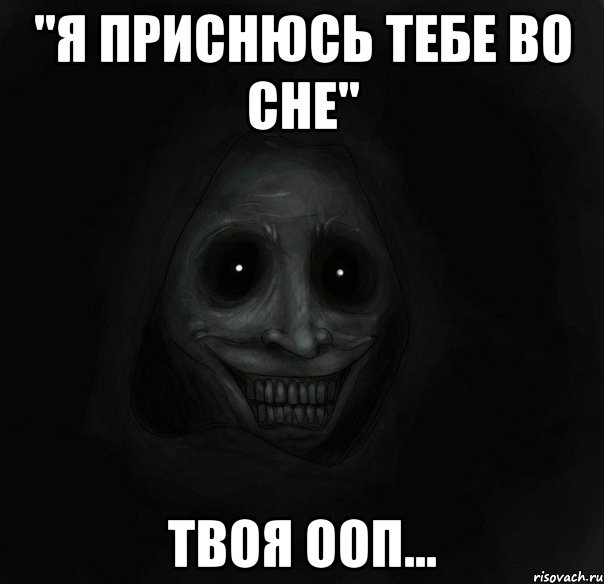